In [1]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import src.graphs_generation as graphs_generation
from src.input_transforms import imageNet_transform, cnn_transform

# ImageNet transform:

Visualization of the expansion of the graph to transform it into a suitable input for models that were trained on VGG. The function "imageNet_transform" adds three channels, and expands the size of the image to be at least 224x224 pixels (rounding up to the nearest integer).

## On random image

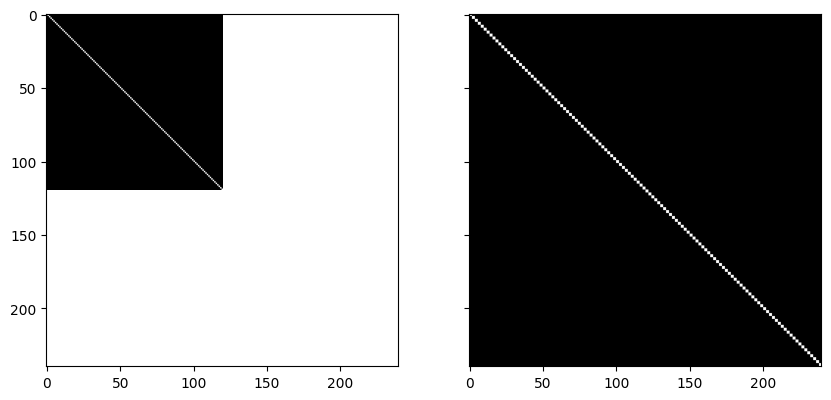

In [18]:
# Generating random image that needs resizing:
rand_image = torch.zeros(120,120)
rand_image.fill_diagonal_(1)
# Applying the transformation to this graph:
transformed_rand_image = imageNet_transform(rand_image)[0]  #selecting a single channel for visualization

# plotting the two images side by side:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

# Display the images
axs[0].imshow(rand_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axs[1].imshow(transformed_rand_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

# Show the plot
plt.show()

## On graph:

Size of graph that is not input to VGG/ResNet: torch.Size([1, 1, 200, 200])
Size of input to VGG/ResNet): torch.Size([1, 3, 400, 400])


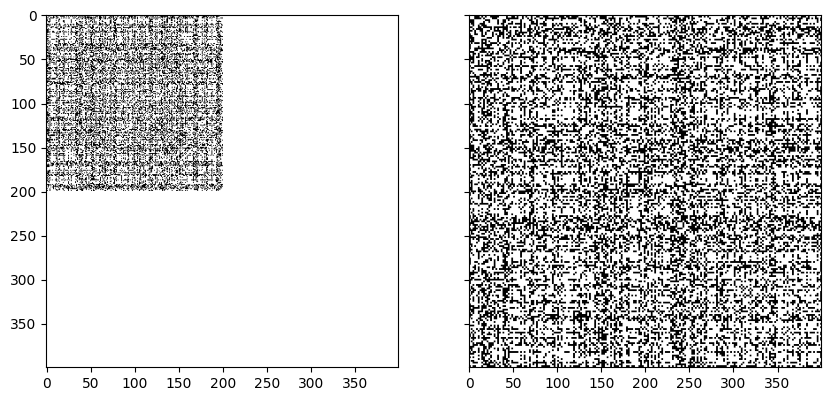

In [30]:
# Generating graphs:

# setting seed so that the same graph is generated:
torch.manual_seed(1)

# generating a single graph that will not be used as input to pretrained models:
no_resize_graph = graphs_generation.generate_graphs(1, 200, 100, "p_increase", False, False, p_clique=1)[0]
print("Size of graph that is not input to VGG/ResNet:", no_resize_graph.shape)
no_resize_graph = np.squeeze(no_resize_graph)   # removing singleton dimensions

# generating a single graph that will be used as input to pretrained models:
resize_graph = graphs_generation.generate_graphs(1, 200, 100, "p_increase", True, False, p_clique=1)[0]
print("Size of input to VGG/ResNet):", resize_graph.shape)
resize_graph = np.squeeze(resize_graph)  # removing singleton dimension
resize_graph = resize_graph[0, :, :]    # selecting a single channel for visualization

# plotting the graphs:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

# Display the images
axs[0].imshow(no_resize_graph, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axs[1].imshow(resize_graph, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

# Show the plot
plt.show()


# CNN transform:

Visualization of the expansion of the graph to transform it into a suitable input for CNNs. The function "cnn_transform" expands the input graph to be a 2400x2400 tensor.

## On random image

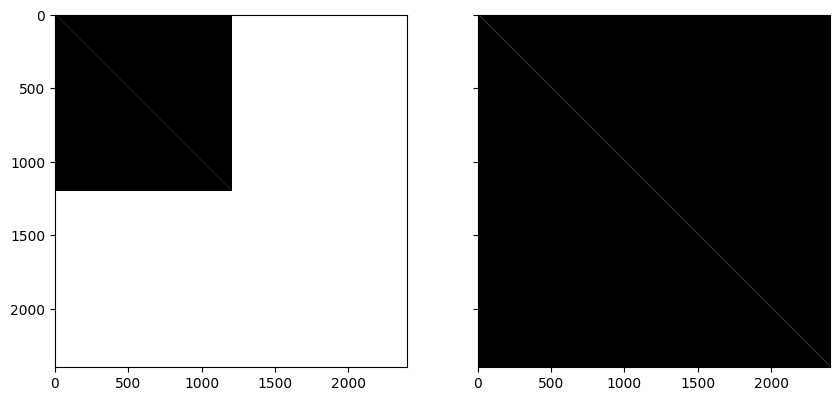

In [33]:
# Generating random image that needs resizing:
rand_image = torch.zeros(1200,1200)
rand_image.fill_diagonal_(1)
# Applying the transformation to this graph:
transformed_rand_image = cnn_transform(rand_image)

# plotting the two images side by side:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

# Display the images
axs[0].imshow(rand_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axs[1].imshow(transformed_rand_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

# Show the plot
plt.show()

## On graph:

Size of graph that is not input to CNN: torch.Size([1, 1, 1200, 1200])
Size of input to VGG/ResNet): torch.Size([1, 1, 2400, 2400])


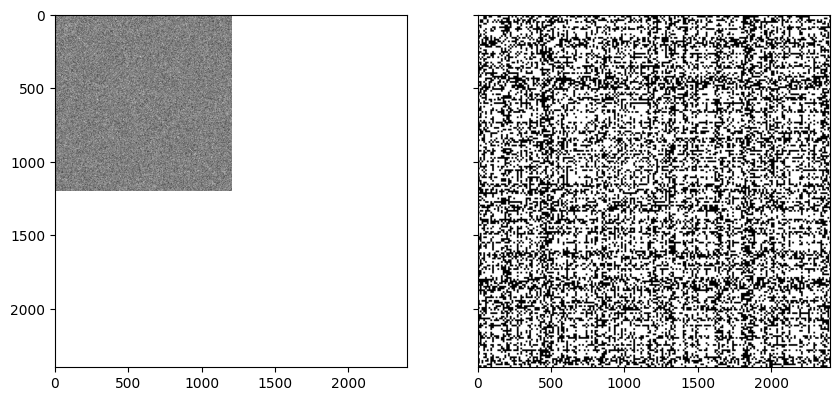

In [37]:
# Generating graphs:

# setting seed so that the same graph is generated:
torch.manual_seed(1)

# generating a single graph that will not be used as input to pretrained models:
no_resize_graph = graphs_generation.generate_graphs(1, 1200, 100, "p_increase", False, False, p_clique=1)[0]
print("Size of graph that is not input to CNN:", no_resize_graph.shape)
no_resize_graph = np.squeeze(no_resize_graph)   # removing singleton dimensions

# generating a single graph that will be used as input to pretrained models:
resize_graph = graphs_generation.generate_graphs(1, 200, 100, "p_increase", False, True, p_clique=1)[0]
print("Size of input to VGG/ResNet):", resize_graph.shape)
resize_graph = np.squeeze(resize_graph)  # removing singleton dimension

# plotting the graphs:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

# Display the images
axs[0].imshow(no_resize_graph, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axs[1].imshow(resize_graph, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

# Show the plot
plt.show()
